In [1]:
import numpy as np
from matplotlib import pyplot as plt
import libs.MEVeS as S
import libs.AtomicConstants.Atom as A
from scipy.optimize import curve_fit

In [94]:
FONT_SIZE = 12
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title

pi_unicode = "\u03C0"
times_unicode = "\u00D7"
plus_minus_unicode = "\u00B1"

# Recreate 07/05/2024 attempt 3

## Import data

### EEVI-READIN reference Raman

In [ ]:
directory = f'C:/Users/pmb18/OneDrive - Imperial College London/General/Memory_Pulse_Transformation/Notebooks/Data/2024-05-07/15-50-13MZI_may7_a3_5s_404pJ/'

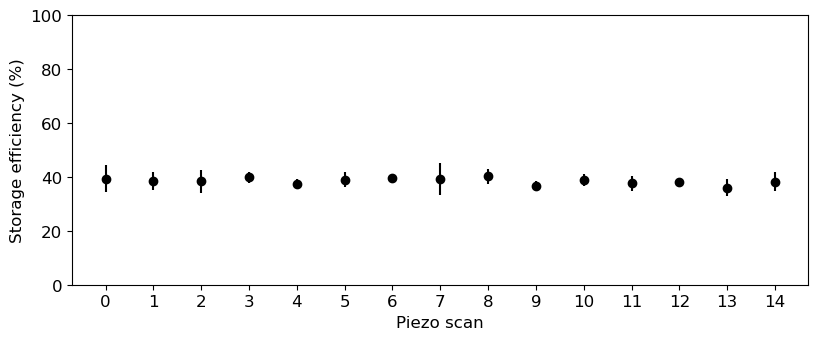

Average storage efficiency =  38 ±  3 %


In [99]:
filename = '15-50-13MZI_may7_a3_5s_404pJphasescan_REF_storage_totalsh10_start160.txt'

Raman_storage = np.loadtxt(directory+filename) # (-, eff, error)

fig, ax = plt.subplots(figsize=(9.5, 3.5))
ax.errorbar(np.arange(len(Raman_storage)),  Raman_storage[:, 1]*100, yerr = Raman_storage[:, 2]*100, fmt='o', color='k')
ax.set_ylim(0, 100)
ax.set_ylabel('Storage efficiency (%)')
ax.set_xlabel('Piezo scan')
ax.set_xticks(np.arange(len(Raman_storage)))
plt.show()

storage_eff = np.mean(Raman_storage[:, 1])
storage_eff_err = np.mean(Raman_storage[:, 2])

print(f"Average storage efficiency = {storage_eff*100: .0f} {plus_minus_unicode} {storage_eff_err*100: .0f} %")

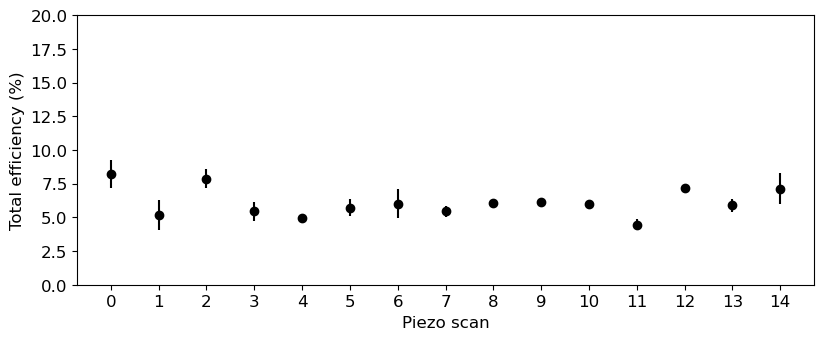

Average total efficiency =  6 ±  1 %


In [105]:
filename = '15-50-13MZI_may7_a3_5s_404pJphasescan_REF_totalREADIN_totalsh10_start160.txt'

Raman_total = np.loadtxt(directory+filename) # (-, eff, error)

fig, ax = plt.subplots(figsize=(9.5, 3.5))
ax.errorbar(np.arange(len(Raman_total)),  Raman_total[:, 1]*100, yerr = Raman_total[:, 2]*100, fmt='o', color='k')
ax.set_ylim(0, 20)
ax.set_ylabel('Total efficiency (%)')
ax.set_xlabel('Piezo scan')
ax.set_xticks(np.arange(len(Raman_total)))
plt.show()

total_eff = np.mean(Raman_total[:, 1])
total_eff_err = np.mean(Raman_total[:, 2])

print(f"Average total efficiency = {total_eff*100: .0f} {plus_minus_unicode} {total_eff_err*100: .0f} %")

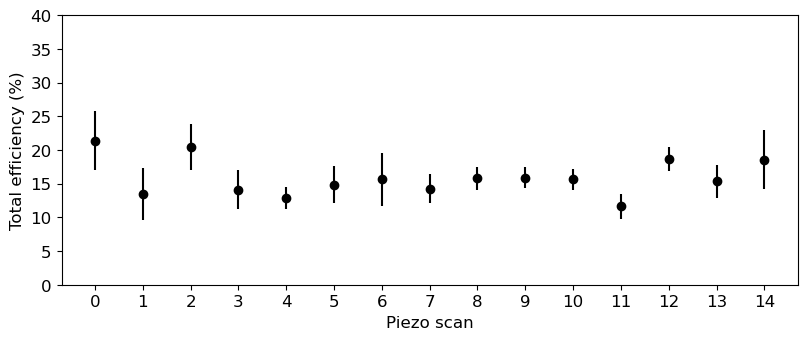

Average retrieval efficiency =  16 ±  3 %


In [183]:
Raman_retrieval = np.zeros((len(Raman_total), 3)) # (-, eff, error)

# EEVI retrieval efficiency
Raman_retrieval[:, 1] = Raman_total[:, 1]/storage_eff

# Error in retrieval efficiency
Raman_total_err_relative = Raman_total[:, 2]/Raman_total[:, 1]
Raman_storage_err_relative = storage_eff_err/storage_eff
Raman_retrieval[:, 2] = (Raman_total_err_relative + Raman_storage_err_relative) * Raman_total[:, 1]/storage_eff

fig, ax = plt.subplots(figsize=(9.5, 3.5))
ax.errorbar(np.arange(len(Raman_retrieval)),  Raman_retrieval[:, 1]*100, yerr = Raman_retrieval[:, 2]*100, fmt='o', color='k')
ax.set_ylim(0, 40)
ax.set_ylabel('Total efficiency (%)')
ax.set_xlabel('Piezo scan')
ax.set_xticks(np.arange(len(Raman_retrieval)))
plt.show()

retrieval_eff = np.mean(Raman_retrieval[:, 1])
retrieval_eff_err = np.mean(Raman_retrieval[:, 2])

print(f"Average retrieval efficiency = {retrieval_eff*100: .0f} {plus_minus_unicode} {retrieval_eff_err*100: .0f} %")

### EEVI READIN

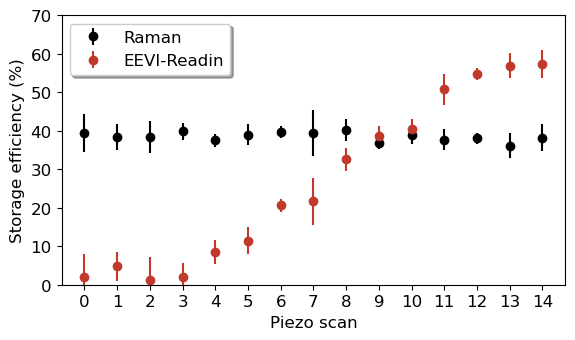

In [237]:
filename = '15-50-13MZI_may7_a3_5s_404pJphasescan_MZI_storage_totalsh10_start160.txt'

EEVI_READIN_storage = np.loadtxt(directory+filename) # (-, eff, error)

fig, ax = plt.subplots(figsize=(6.5, 3.5))
ax.errorbar(np.arange(len(Raman_storage)),  Raman_storage[:, 1]*100, yerr = Raman_storage[:, 2]*100, fmt='o', color='k', label='Raman')
ax.errorbar(np.arange(len(EEVI_READIN_storage)),  EEVI_READIN_storage[:, 1]*100, yerr = EEVI_READIN_storage[:, 2]*100, fmt='o', color='#c0392bff', label='EEVI-Readin')
ax.set_ylim(0, 70)
ax.set_ylabel('Storage efficiency (%)')
ax.set_xlabel('Piezo scan')
ax.set_xticks(np.arange(len(EEVI_READIN_storage)))
plt.legend(fancybox=True, shadow=True)
plt.show()

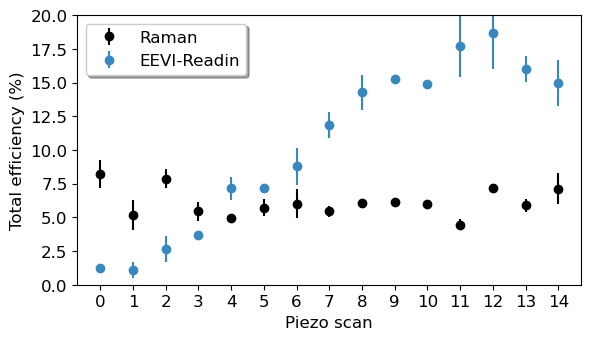

In [238]:
filename = '15-50-13MZI_may7_a3_5s_404pJphasescan_MZI_totalREADIN_totalsh10_start160.txt'

EEVI_READIN_total = np.loadtxt(directory+filename) # (-, eff, error)

fig, ax = plt.subplots(figsize=(6.5, 3.5))
ax.errorbar(np.arange(len(Raman_total)),  Raman_total[:, 1]*100, yerr = Raman_total[:, 2]*100, fmt='o', color='k', label='Raman')
ax.errorbar(np.arange(len(EEVI_READIN_total)),  EEVI_READIN_total[:, 1]*100, yerr = EEVI_READIN_total[:, 2]*100, fmt='o', color='#3788bfff', label='EEVI-Readin')
ax.set_ylim(0, 20)
ax.set_ylabel('Total efficiency (%)')
ax.set_xlabel('Piezo scan')
ax.set_xticks(np.arange(len(EEVI_READIN_total)))
plt.legend(fancybox=True, shadow=True)
plt.show()

### EEVI READOUT

In [240]:
directory = f'C:/Users/pmb18/OneDrive - Imperial College London/General/Memory_Pulse_Transformation/Notebooks/Data/2024-05-08/16-41-33MZI_may8_a6_5s_400pJ/'

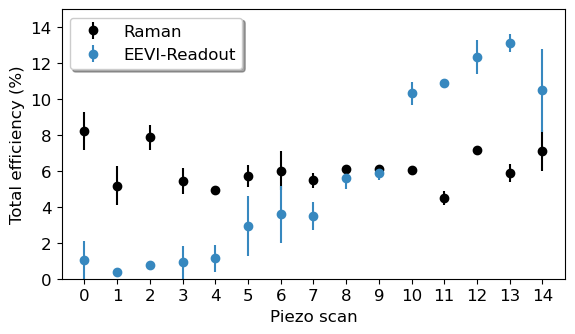

In [246]:
filename = '16-41-33MZI_may8_a6_5s_400pJphase_scan_MZI_totalREADOUT_totalshots10_startshot390.txt'

EEVI_READOUT_total = np.loadtxt(directory+filename) # (-, eff, error)

fig, ax = plt.subplots(figsize=(6.5, 3.5))
ax.errorbar(np.arange(len(Raman_total)),  Raman_total[:, 1]*100, yerr = Raman_total[:, 2]*100, fmt='o', color='k', label='Raman')
ax.errorbar(np.arange(len(EEVI_READOUT_total)),  EEVI_READOUT_total[:, 1]*100, yerr = EEVI_READOUT_total[:, 2]*100, fmt='o', color='#3788bfff', label='EEVI-Readout')
ax.set_ylim(0, 15)
ax.set_ylabel('Total efficiency (%)')
ax.set_xlabel('Piezo scan')
ax.set_xticks(np.arange(len(EEVI_READOUT_total)))
plt.legend(fancybox=True, shadow=True)
plt.show()

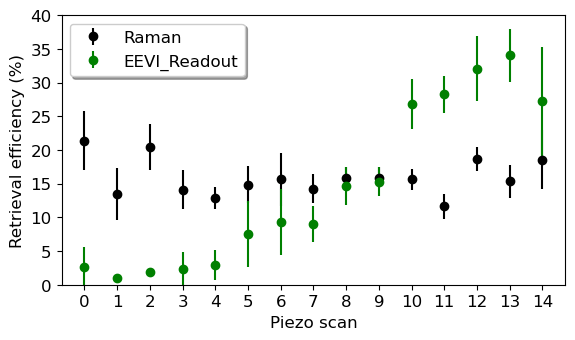

In [245]:
EEVI_READOUT_retrieval = np.zeros((len(EEVI_READOUT_total), 3)) # (-, eff, error)

# EEVI retrieval efficiency
EEVI_READOUT_retrieval[:, 1] = EEVI_READOUT_total[:, 1]/storage_eff

# Error in retrieval efficiency
EEVI_err_relative = EEVI_READOUT_total[:, 2]/EEVI_READOUT_total[:, 1]
Raman_err_relative = storage_eff_err/storage_eff
EEVI_READOUT_retrieval[:, 2] = (EEVI_err_relative + Raman_err_relative) * EEVI_READOUT_total[:, 1]/storage_eff

fig, ax = plt.subplots(figsize=(6.5, 3.5))
ax.errorbar(np.arange(len(Raman_retrieval)),  Raman_retrieval[:, 1]*100, yerr = Raman_retrieval[:, 2]*100, fmt='o', color='k', label='Raman')
ax.errorbar(np.arange(len(EEVI_READOUT_retrieval)),  EEVI_READOUT_retrieval[:, 1]*100, yerr = EEVI_READOUT_retrieval[:, 2]*100, fmt='o', color='#008000ff', label='EEVI_Readout')
ax.set_ylim(0, 40)
ax.set_ylabel('Retrieval efficiency (%)')
ax.set_xlabel('Piezo scan')
ax.set_xticks(np.arange(len(EEVI_READIN_total)))
plt.legend(fancybox=True, shadow=True)
plt.show()

### EEVI COMBINED

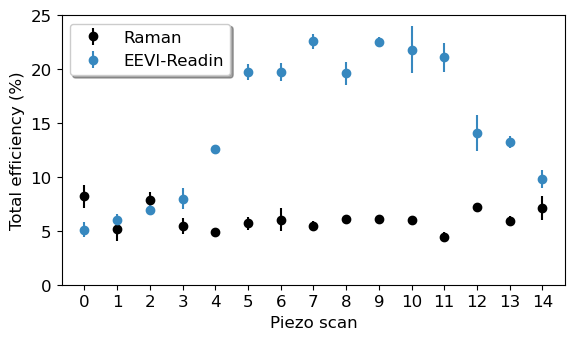

In [249]:
directory = f'C:/Users/pmb18/OneDrive - Imperial College London/General/Memory_Pulse_Transformation/Notebooks/Data/2024-05-07/15-50-13MZI_may7_a3_5s_404pJ/'

filename = '15-50-13MZI_may7_a3_5s_404pJphase_scan_MZI_totalCOMBINED_totalshots10_startshot160.txt'

EEVI_COMBINED_total = np.loadtxt(directory+filename) # (-, eff, error)

fig, ax = plt.subplots(figsize=(6.5, 3.5))
ax.errorbar(np.arange(len(Raman_total)),  Raman_total[:, 1]*100, yerr = Raman_total[:, 2]*100, fmt='o', color='k', label='Raman')
ax.errorbar(np.arange(len(EEVI_COMBINED_total)),  EEVI_COMBINED_total[:, 1]*100, yerr = EEVI_COMBINED_total[:, 2]*100, fmt='o', color='#3788bfff', label='EEVI-Readin')
ax.set_ylim(0, 25)
ax.set_ylabel('Total efficiency (%)')
ax.set_xlabel('Piezo scan')
ax.set_xticks(np.arange(len(EEVI_COMBINED_total)))
plt.legend(fancybox=True, shadow=True)
plt.show()

## EEVI-READIN

### Reference Raman

In [184]:
print(f"Average storage efficiency = {storage_eff*100: .0f} {plus_minus_unicode} {storage_eff_err*100: .0f} %")
print(f"Average retrieval efficiency = {retrieval_eff*100: .0f} {plus_minus_unicode} {retrieval_eff_err*100: .0f} %")
print(f"Average total efficiency = {total_eff*100: .0f} {plus_minus_unicode} {total_eff_err*100: .0f} %")

Average storage efficiency =  38 ±  3 %
Average retrieval efficiency =  16 ±  3 %
Average total efficiency =  6 ±  1 %


In [70]:
config = {"Hyperfine splitting": False, "states": {"initial": {"F": 4}, "intermediate": {"n": 6, "J": 3/2}, 
                                                    "storage": {"n":6 ,"L": 0, "F" : 3}}}
atom = A.Cs(config)

In [191]:
T = 273.15+85 # temperature of the ensemble in K
vno = 30 # number of velocity classes to simulate.
L = 0.075 # length of the cell in m

OD_fudge_factor = 0.3

OD = OD_fudge_factor*atom.optical_depth(T, L)
print(f"OD (stationary) = {OD: .0f}")
ODeff = atom.effective_optical_depth(OD, T) # not needed for the simulation
print(f"Effective OD = {ODeff: .0f}")

n = 75 # number of space steps. Note these are not evenly spaced.

Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno)) # initial spin wave

OD (stationary) =  43876
Effective OD =  963


In [192]:
photon_pol = np.array([1, 0]) #should be normalised

tau = np.sqrt(2)*330e-12 # 330ps FWHM in intensity

t0 = 3*tau # time of arrival of peak of photon wave packet.
tend = 15e-9 # end time of simulation
tbounds = np.array([0, tend]) # bounds of simulation time axis

m = 800 # number of time steps
t = np.linspace(0, tend, m) # time axis

HGmode = 0
Einits = np.array(S.photon_HermiteG(t, t0, tau, HGmode))[:, None] * photon_pol[None, :] # signal field initial condition

detuning = 2*np.pi*2*atom.deltaHF
deltaS = detuning # detuning of the signal field
deltaC = detuning # detuning of the control field

In [225]:
beam_radius = 100e-6 # in m
control_fudge_factor = 1/17

energy_readin = 404e-12 # in J
energy_readin = energy_readin * control_fudge_factor
print(f"Energy readin = {energy_readin*1e12} pJ")

energy_readout = 150e-12 # in J
energy_readout = energy_readout * control_fudge_factor
print(f"Energy readin = {energy_readout*1e12} pJ")

Energy readin = 23.764705882352942 pJ
Energy readin = 8.823529411764707 pJ


In [226]:
tr = 12.5e-9 # storage time

Control_store = S.photon_HermiteG(t, t0, tau, 0) # temporal shape of control field
Control_retrieve = S.photon_HermiteG(t, t0+tr, tau, 0) # temporal shape of control field

Control_store = atom.set_energy_of_control_pulse(energy_readin, Control_store, t, r=beam_radius)
Control_retrieve = atom.set_energy_of_control_pulse(energy_readout, Control_retrieve, t, r=beam_radius)

print(f"Max rabi frequency of Control_store (2{pi_unicode} {times_unicode} MHz) = {np.max(np.abs(Control_store))/(2*np.pi*1e6): .0f} ")
print(f"Energy of Control_store = {atom.control_pulse_to_energy(Control_store, t, r=beam_radius)*1e12: .0f} pJ")
print()

print(f"Max rabi frequency of Control_retrieve (2{pi_unicode} {times_unicode} MHz) = {np.max(np.abs(Control_retrieve))/(2*np.pi*1e6): .0f} ")
print(f"Energy of Control_retrieve = {atom.control_pulse_to_energy(Control_retrieve, t, r=beam_radius)*1e12: .0f} pJ")

Max rabi frequency of Control_store (2π × MHz) =  816 
Energy of Control_store =  24 pJ

Max rabi frequency of Control_retrieve (2π × MHz) =  497 
Energy of Control_retrieve =  9 pJ


In [227]:
control_pol = np.array([1, 0]) #should be normalised

Control_tp = (Control_store + Control_retrieve)[:, None] * control_pol[None, :] # control field
protocol = 'Raman' # Memory protocol

sol = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

Control_tzp = sol.co_prop( Control_tp )
sol.solve(Control_tzp, method='RK4-Ralston')

storage = sol.storage_efficiency(sol.S, mi=m//2) # half way through simulation
retrieved = sol.retrieval_efficiency(sol.E, m//2, 0)

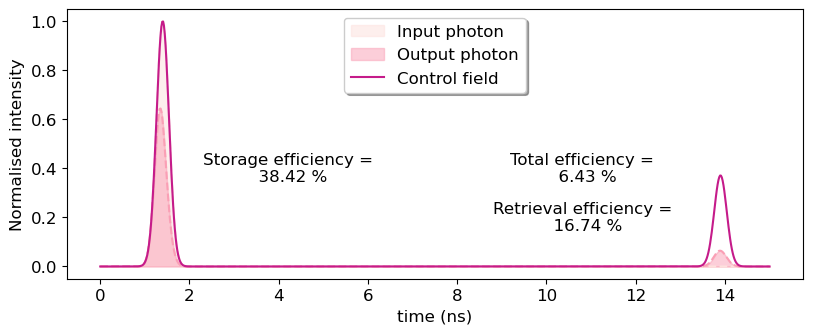

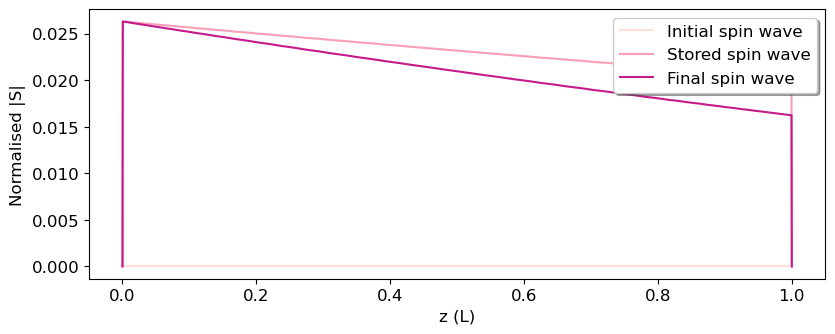

In [228]:
photon_norm = max(pow(np.abs(sol.E[:, 0, 0]),2)) # normalise factor for plotting photon field
control_norm = pow(np.max(np.abs(Control_store)), 2) # normalise factor for plotting control field

fig, ax = plt.subplots(figsize=(9.5, 3.5))

ax.plot(t*1e9, pow(np.abs(sol.E[:, 0, 0]),2)/photon_norm, color='#fde0ddff', linestyle='dashed')
ax.fill_between(t*1e9, np.abs(sol.E[:, 0, 0])**2 /photon_norm, color='#fde0ddff', alpha=0.5, label='Input photon')
ax.plot(t*1e9, pow(np.abs(sol.E[:, -1, 0]),2)/photon_norm, color='#fa9fb5ff', linestyle='dashed')
ax.fill_between(t*1e9, np.abs(sol.E[:, -1, 0])**2 /photon_norm, color='#fa9fb5ff', alpha=0.5, label='Output photon')
ax.plot(t*1e9, np.abs(Control_tp[:, 0])**2/control_norm, color='#c51b8aff', label='Control field')
ax.set_ylabel('Normalised intensity', color='k')
ax.set_xlabel('time (ns)')
plt.legend(loc='upper center', fancybox=True, shadow=True)
plt.text((3*t0)*1e9, 0.4, f'Storage efficiency =\n {storage*100: 0.2f} %', horizontalalignment='center', verticalalignment='center')
plt.text((tend-3*t0)*1e9, 0.4, f'Total efficiency =\n {retrieved*100: 0.2f} %', horizontalalignment='center', verticalalignment='center')
plt.text((tend-3*t0)*1e9, 0.2, f'Retrieval efficiency =\n {(retrieved/storage)*100: 0.2f} %', horizontalalignment='center', verticalalignment='center')
plt.show()

fig, ax = plt.subplots(figsize=(9.5, 3.5))

ax.plot(sol.zCheby, np.abs(sol.S[0, :, 0, 0, 0, 0, 0]), color='#fde0ddff', label='Initial spin wave')
ax.plot(sol.zCheby, np.abs(sol.S[m//2, :, 0, 0, 0, 0, 0]), color='#fa9fb5ff', label='Stored spin wave')
ax.plot(sol.zCheby, np.abs(sol.S[-1, :, 0, 0, 0, 0, 0]), color='#c51b8aff', label='Final spin wave')
ax.set_ylabel('Normalised |S|', color='k')
ax.set_xlabel('z (L)')
plt.legend(loc='upper right', fancybox=True, shadow=True)
plt.show()

### EEVI-READIN

In [229]:
eta_loop = 0.55

In [230]:
t0 = 3*tau # time of arrival of peak of photon wave packet.
tend = 2*t0 # end time of simulation
tbounds = np.array([0, tend]) # bounds of simulation time axis

m = 800 # number of time steps
t = np.linspace(0, tend, m) # time axis

HGmode = 0
Einits = np.array(S.photon_HermiteG(t, t0, tau, HGmode))[:, None] * photon_pol[None, :] # signal field initial condition
Sinits = np.zeros((n, len(atom.Fg), len(atom.mg), len(atom.Fq), len(atom.mq), vno)) # initial spin wave

In [231]:
ControlW1 = S.photon_HermiteG(t, t0, tau, 0) # temporal shape of control field

ControlW1 = atom.set_energy_of_control_pulse(energy_readin, ControlW1, t, r=beam_radius)

print(f"Max rabi frequency of ControlW1 (2{pi_unicode} {times_unicode} MHz) = {np.max(np.abs(ControlW1))/(2*np.pi*1e6): .0f} ")
print(f"Energy of ControlW1 = {atom.control_pulse_to_energy(ControlW1, t, r=beam_radius)*1e12: .0f} pJ")

Max rabi frequency of ControlW1 (2π × MHz) =  816 
Energy of ControlW1 =  24 pJ


In [232]:
### Solve first storage
Control_tp = (ControlW1)[:, None] * control_pol[None, :] # control field
protocol = 'Raman' # Memory protocol

solW1 = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)

Control_tzp = solW1.co_prop( Control_tp )
solW1.solve(Control_tzp, method='RK4-Ralston')

storageW1 = solW1.storage_efficiency(solW1.S, mi=-1)
leakedW1 = solW1.retrieval_efficiency(solW1.E, 0, 0)

Sout = solW1.S[-1]
Eout = solW1.E[:, -1]*np.sqrt(sol.gamma)

In [235]:
### Loop through phases
phase_list = 2*np.pi*np.linspace(-0.1, 1.1, 20)

storage_eff_list = []
total_eff_list = []
retrieval_eff_list = []

for phase in phase_list:

    ### Second storage attempt    
    Einits = Eout*np.sqrt(eta_loop)*np.exp(1j*phase) # signal field initial condition
    Sinits = Sout

    ControlW2 = S.photon_HermiteG(t, t0, tau, 0) # temporal shape of control field
    ControlW2 = atom.set_energy_of_control_pulse(energy_readin, ControlW2, t, r=beam_radius)
    Control_tp = (ControlW2)[:, None] * control_pol[None, :] # control field

    solW2 = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)
    Control_tzp = solW2.co_prop( Control_tp )
    solW2.solve(Control_tzp, method='RK4-Ralston')

    storageW2 = solW1.storage_efficiency(solW2.S, mi=-1)
    storage_eff_list.append( storageW2 )

    ### Retrieval
    Einits = np.zeros(m)[:, None] * photon_pol[None, :] # signal field initial condition
    Sinits = solW2.S[-1]

    ControlR = S.photon_HermiteG(t, t0, tau, 0) # temporal shape of control field
    ControlR = atom.set_energy_of_control_pulse(energy_readout, ControlR, t, r=beam_radius)
    Control_tp = (ControlR)[:, None] * control_pol[None, :] # control field

    solR = S.solver(atom, protocol, Einits, Sinits, [deltaS, deltaC], OD, L, n, m, tbounds, T, vno)
    Control_tzp = solR.co_prop( Control_tp )
    solR.solve(Control_tzp, method='RK4-Ralston')

    total = solR.retrieval_efficiency(solR.E, 0, 0)
    total_eff_list.append( total )

    retrieval_eff_list.append( total/storageW2 )

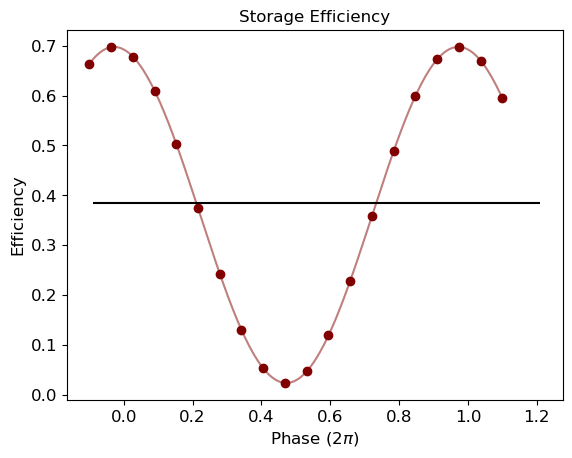

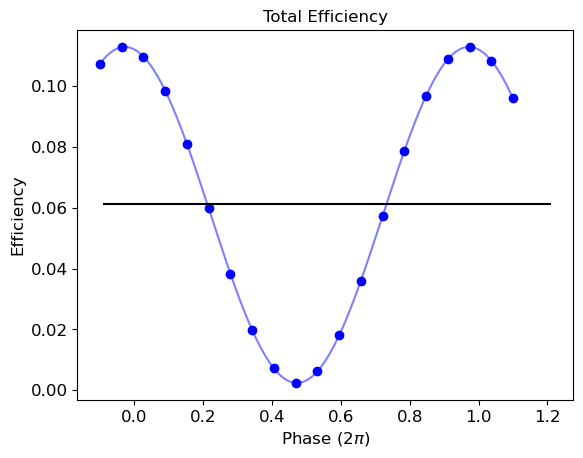

In [236]:
phase_list_dense = 2*np.pi*np.linspace(-0.1, 1.1, 200)

colour = '#800000ff'
plt.plot(phase_list/(2*np.pi), storage_eff_list, 'o', color=colour)
parameters = np.polyfit(phase_list, np.array(storage_eff_list), 10)
plt.plot(phase_list_dense/(2*np.pi),  np.poly1d(parameters)(np.mod(phase_list_dense-min(phase_list), 2*np.pi) + min(phase_list)), '-', color=colour, alpha=0.5)
plt.hlines(storage_eff, 0.9*min(phase_list/(2*np.pi)), 1.1*max(phase_list/(2*np.pi)), 'k')
plt.xlabel('Phase ($2 \pi$)')
plt.ylabel('Efficiency')
plt.title('Storage Efficiency')
plt.show()

colour = 'blue'
plt.plot(phase_list/(2*np.pi), total_eff_list, 'o', color='blue')
parameters = np.polyfit(phase_list, np.array(total_eff_list), 10)
plt.plot(phase_list_dense/(2*np.pi), np.poly1d(parameters)(np.mod(phase_list_dense-min(phase_list), 2*np.pi) + min(phase_list)), '-', color=colour, alpha=0.5)
plt.hlines(total_eff, 0.9*min(phase_list/(2*np.pi)), 1.1*max(phase_list/(2*np.pi)), 'k')
plt.xlabel('Phase ($2 \pi$)')
plt.ylabel('Efficiency')
plt.title('Total Efficiency')
plt.show()

Run for four cases. Lowest/highest loop and lowest/highest control power